<a href="https://colab.research.google.com/github/IlyaMolchanovv/MachineLearning/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing

Загрузить датасет "Boston Housing" .


In [13]:
data = pd.read_csv('/content/boston_house_prices.csv')

Изучите структуру и содержание данных. Вывести первые
несколько строк и описание каждого столбца

In [14]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Провести предварительный анализ данных, включая проверку
наличия пропущенных значений, выбросов и корреляции между
переменными. Если необходимо, то провести стандартизацию
(нормализацию) данных, чтобы все признаки имели одинаковый масштаб.


In [16]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

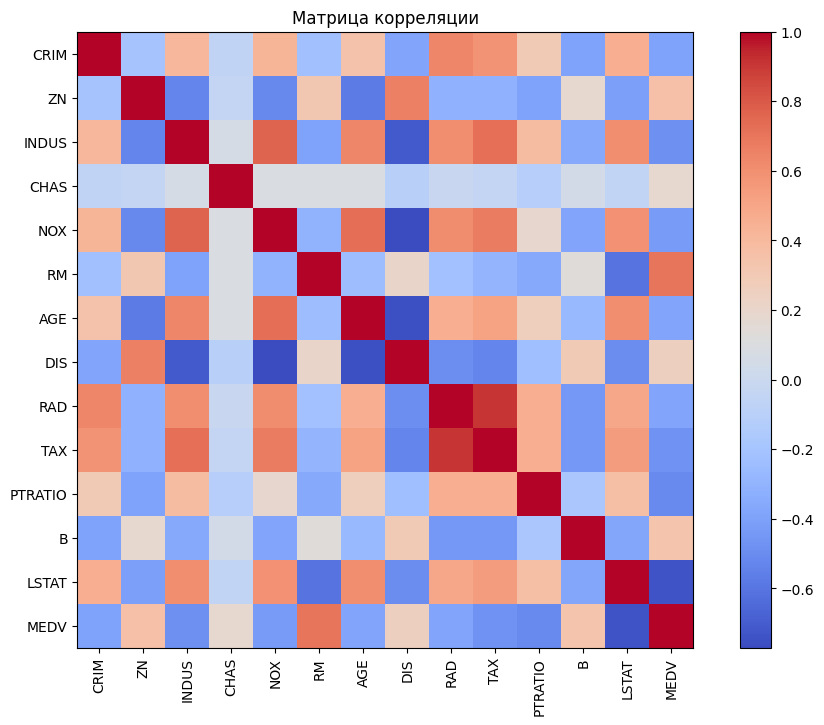

In [17]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Матрица корреляции')
plt.show()

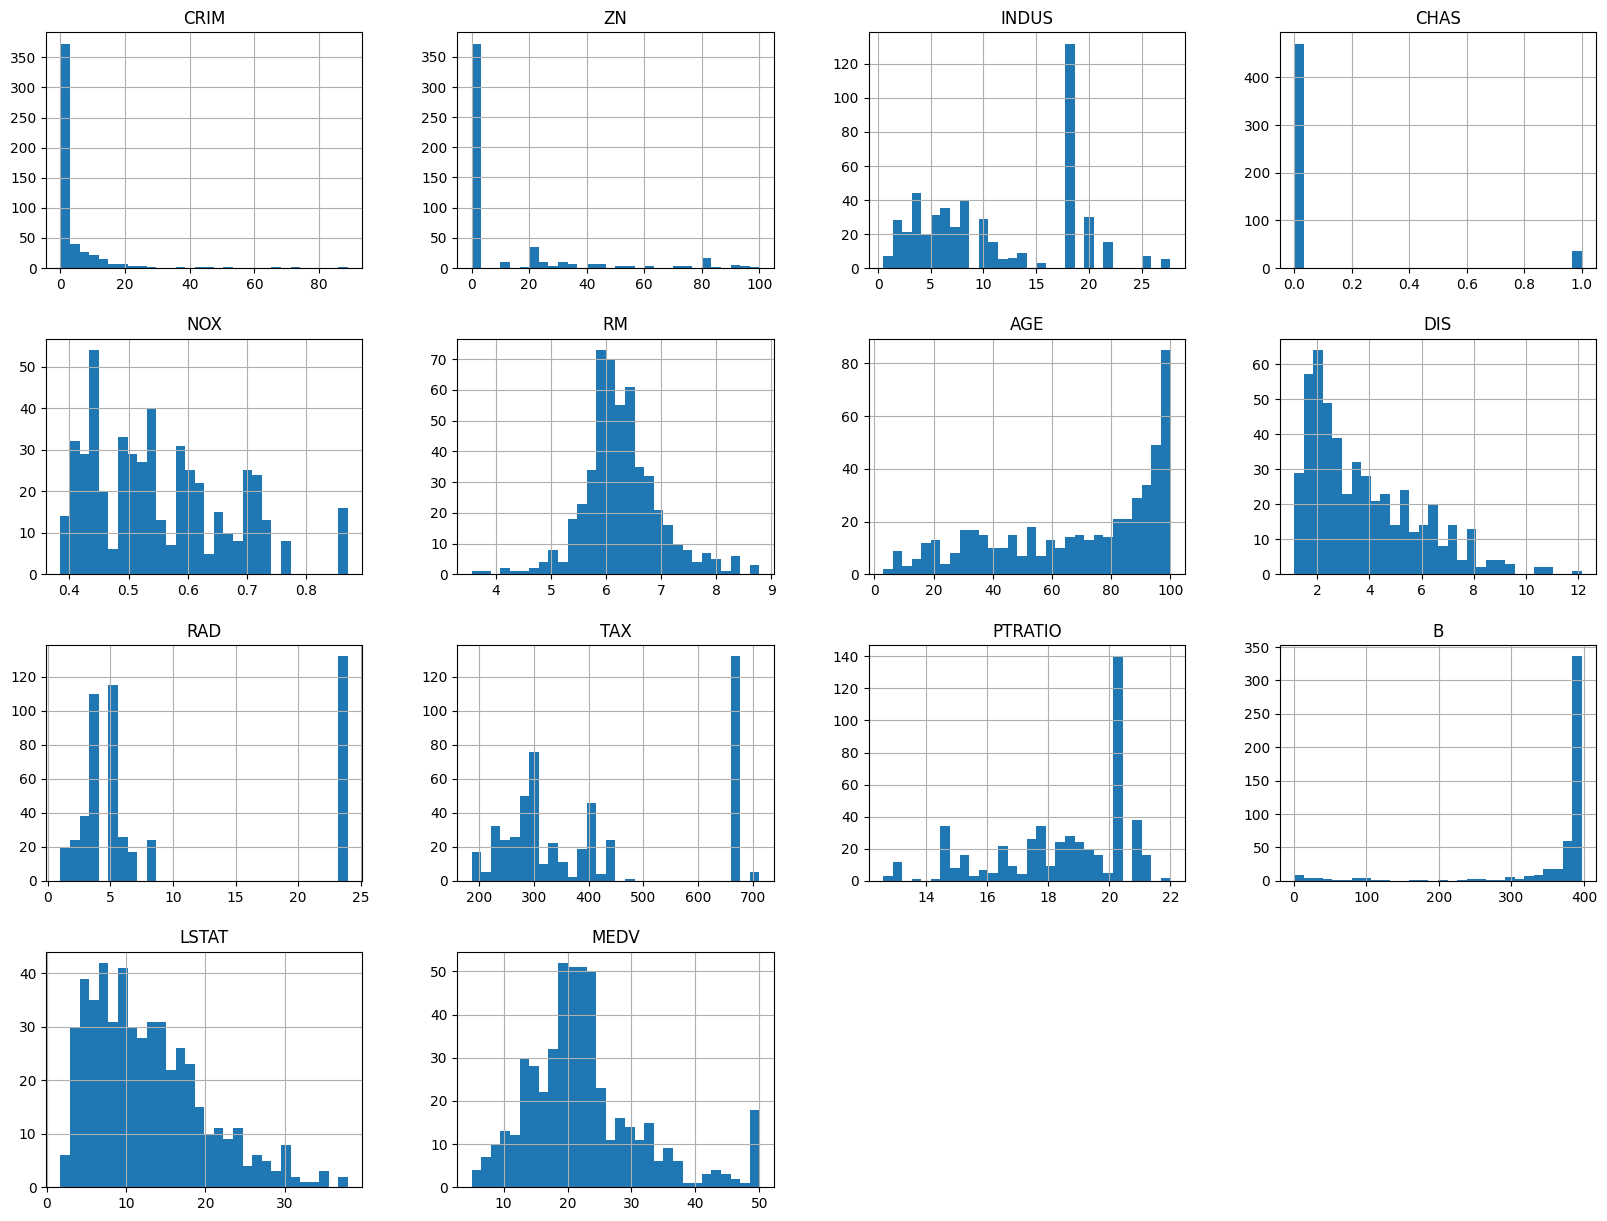

In [18]:
data.hist(bins=30, figsize=(20, 15))
plt.show()

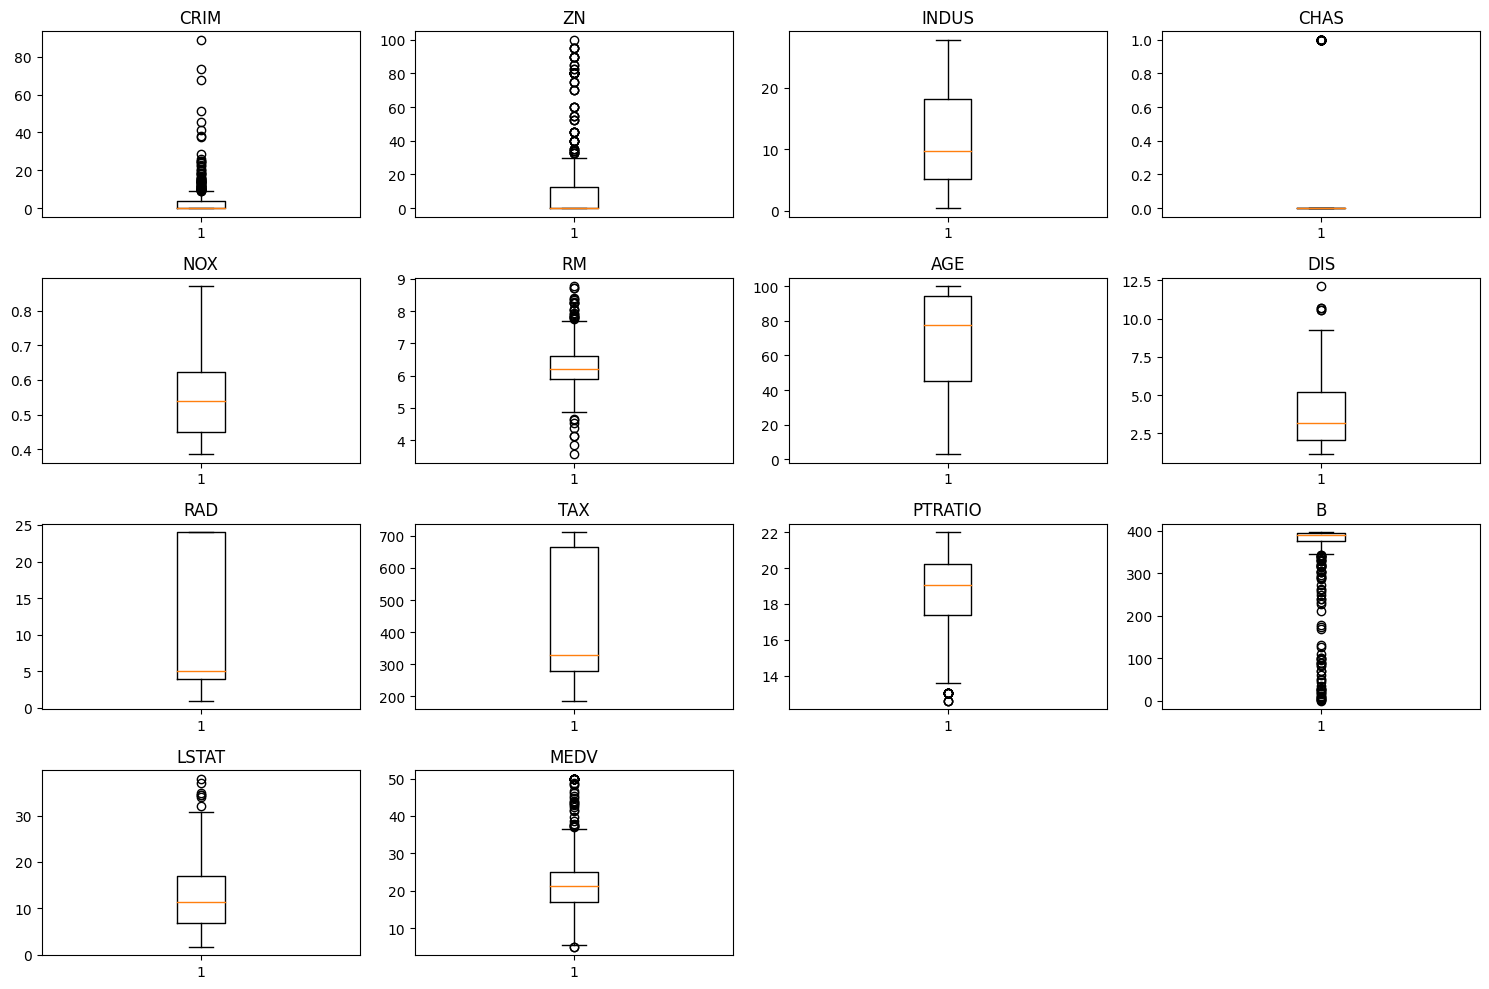

In [19]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [237]:
scaler = StandartScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled = data_scaled.drop(columns=['TAX', 'RAD', 'INDUS', 'CRIM', 'RM', 'AGE'])

In [261]:
min_value=0
max_value=1

data_scaled = (data-data.min())/(data.max()-data.min())*(max_value-min_value)+min_value
data_scaled = data_scaled.drop(columns=['TAX', 'RAD', 'INDUS', 'CRIM', 'RM', 'AGE'])

In [262]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [263]:
data_scaled

,ZN,CHAS,NOX,DIS,PTRATIO,B,LSTAT,MEDV
0,0.18,0.0,0.314815,0.269203,0.287234,1.000000,0.089680,0.422222
1,0.00,0.0,0.172840,0.348962,0.553191,1.000000,0.204470,0.368889
2,0.00,0.0,0.172840,0.348962,0.553191,0.989737,0.063466,0.660000
3,0.00,0.0,0.150206,0.448545,0.648936,0.994276,0.033389,0.631111
4,0.00,0.0,0.150206,0.448545,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...
501,0.00,0.0,0.386831,0.122671,0.893617,0.987619,0.219095,0.386667
502,0.00,0.0,0.386831,0.105293,0.893617,1.000000,0.202815,0.346667
503,0.00,0.0,0.386831,0.094381,0.893617,1.000000,0.107892,0.420000
504,0.00,0.0,0.386831,0.114514,0.893617,0.991301,0.131071,0.377778


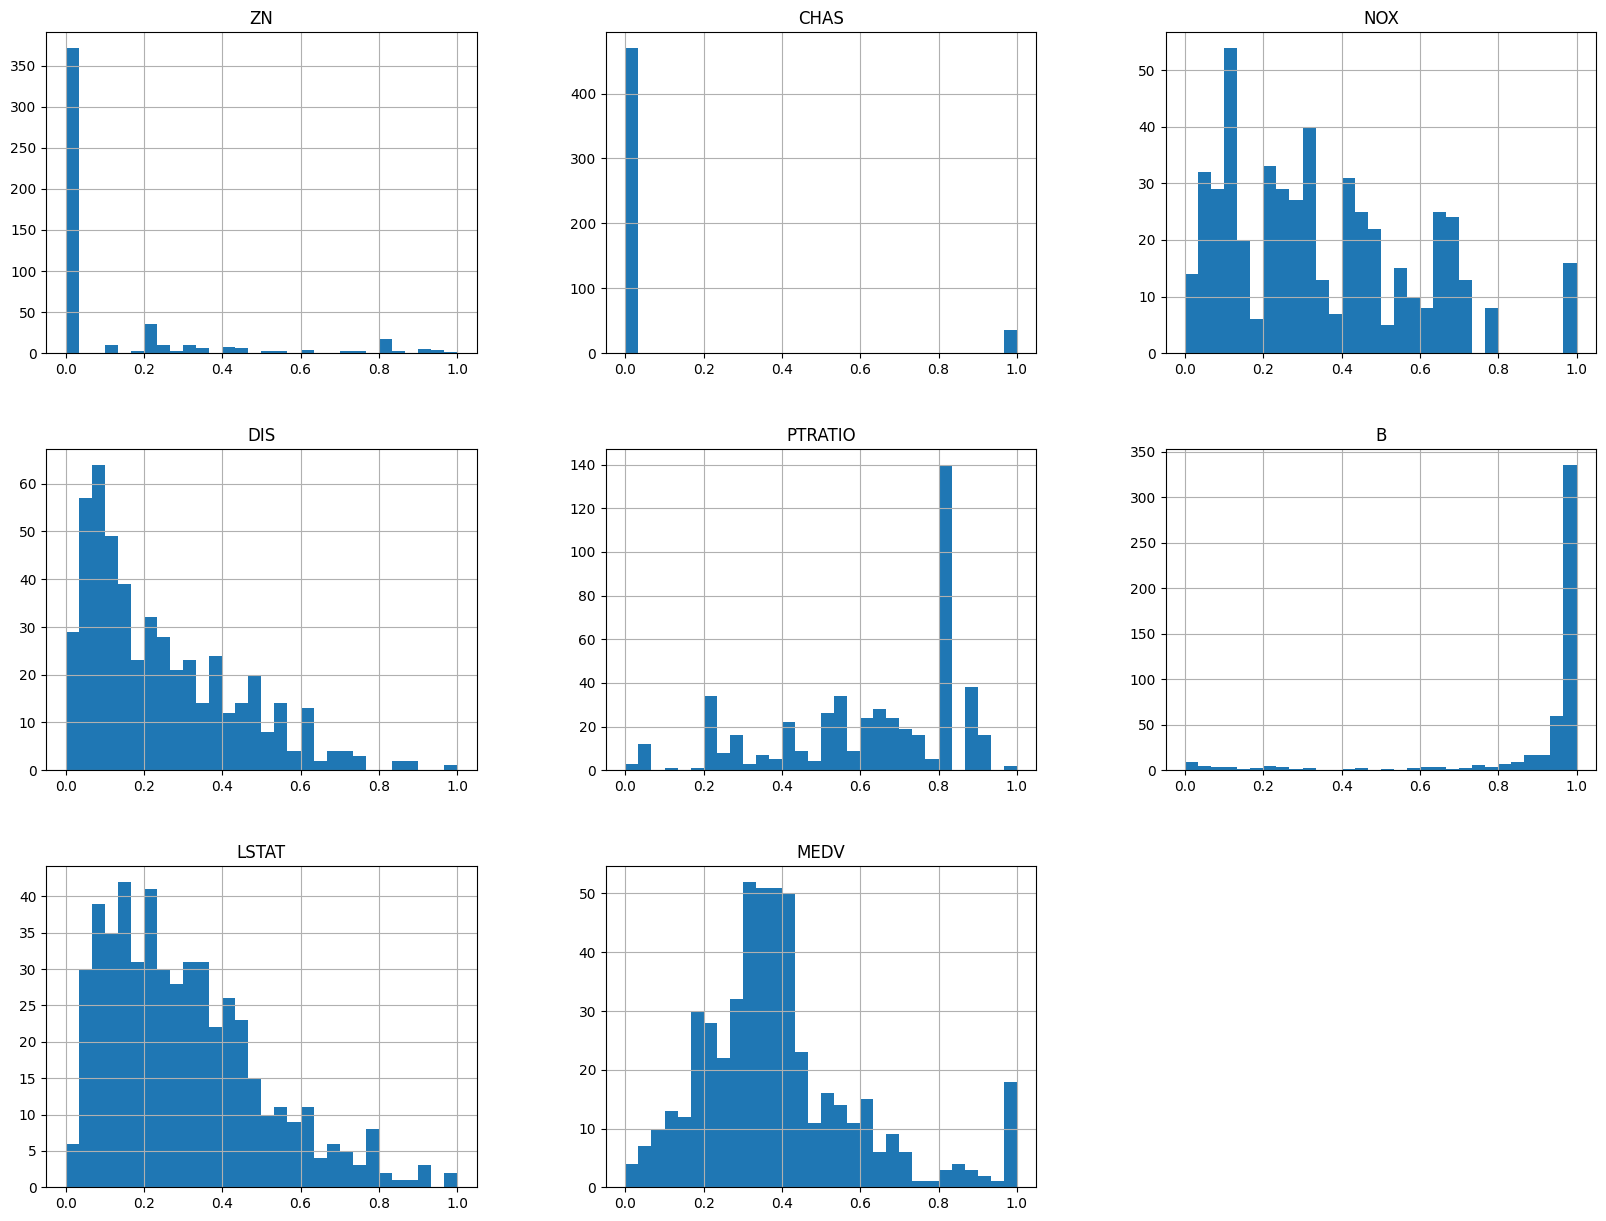

In [264]:
data_scaled.hist(bins=30, figsize=(20, 15))
plt.show()

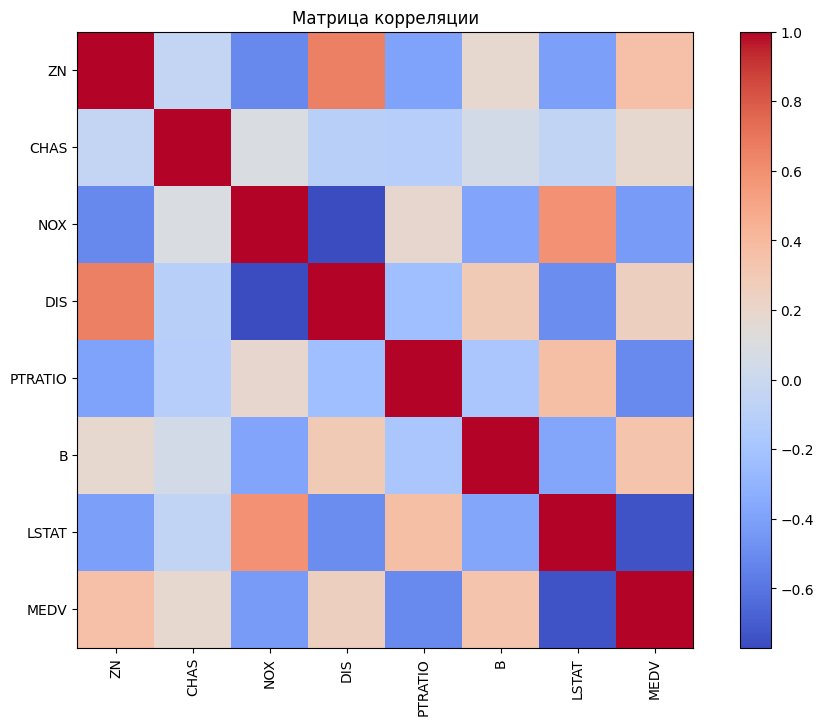

In [265]:
correlation_matrix = data_scaled.corr().round(2)
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Матрица корреляции')
plt.show()

Разбить данные на обучающую и тестовую выборки в
соотношении 70/30.

In [267]:
X = data_scaled.drop('MEDV', axis=1)
y = data_scaled['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

Обучить модель линейной регрессии на обучающей выборк

In [268]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [269]:
y_pred = model.predict(X_test)
print(y_pred)

[ 0.61690503  0.59540277  0.4549519   0.47892846  0.66443625  0.33169235
 -0.09820528  0.25362752  0.37710123  0.28271579  0.27128317  0.23719396
  0.09610855  0.18523696  0.41105957  0.3435761   0.59370984  0.31824796
  0.63536667  0.09478859  0.23396025  0.2561361   0.44487968  0.26669633
  0.32276434  0.34759046  0.68630513  0.23725858  0.3397607   0.2502585
  0.54244915  0.10846328  0.58841451  0.11119924  0.26498423  0.5804358
  0.57160066  0.3707641   0.34242195  0.4777481   0.59659302  0.54053109
  0.47473608 -0.01047286  0.36770963  0.16750811  0.28922961  0.64826063
  0.50005202  0.27644671  0.44935531  0.57854221  0.38335495  0.24665796
  0.3707732   0.32234743 -0.02322706  0.8027604   0.13377776  0.22416187
 -0.14184873  0.63923261  0.31478602  0.39671903  0.54317518  0.54733021
  0.49146683  0.41966426  0.54738743  0.48917987  0.01161876  0.0887722
  0.54465554  0.63329769  0.56837158  0.44476918  0.50679747  0.3936996
  0.49082226  0.5409181   0.74019437  0.62998047  0.598

Оценить качество модели на тестовой выборке с помощью таких
метрик как средняя абсолютная ошибка (MAE), средняя квадратичная ошибка
(MSE), корень среднеквадратичной ошибки (RMSE) и коэффициент
детерминации (R^2)

In [270]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R^2:', r2)

MAE: 0.09016623459411903
MSE: 0.017412190843729424
RMSE: 0.1319552607656452
R^2: 0.5835487227139587


Визуализируйте результаты предсказания, сравнив исходные
значения цены недвижимости с предсказанными значениями.


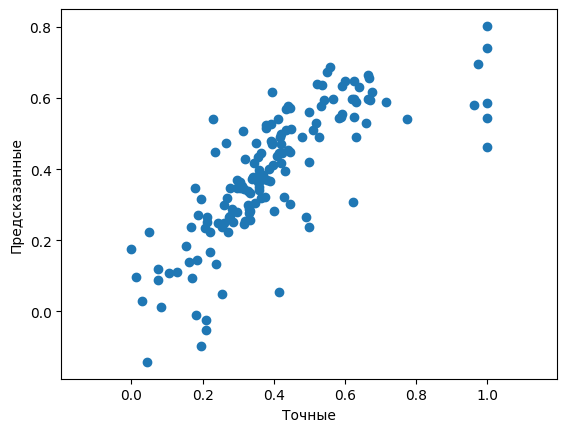

In [271]:
plt.scatter(y_test, y_pred)
plt.xlabel('Точные')
plt.ylabel('Предсказанные')
plt.axis('equal')
plt.show()

Провести кросс-валидацию модели и оценить ее качество с
помощью метрик MSE, RMSE и R^2.

In [272]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print('Cross-Validation RMSE:', cv_rmse_scores.mean())
print('Cross-Validation R^2:', cv_r2_scores.mean())

Cross-Validation RMSE: 0.12479106465962544
Cross-Validation R^2: 0.6514069049112251
